# Build and evaluate a regression model
In this notebook we build regression models using linear regression and knn algorithms and choose the best one.

## Import the libraries we need


In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn functionality
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error

# Convenience functions.  This can be found on the course github
from functions import *

## Define the task
"Make predictions about a country's life expectancy in years from a set of metrics for the country."

# Acquire clean data
## Load the data
We will load and clean our data.

In [2]:
# Load the data set
dataset = pd.read_csv("world_data.csv")

# Remove sparsely populated features
dataset = dataset.drop(["murder","urbanpopulation","unemployment"], axis=1)

# Impute all features with mean
means = dataset.mean().to_dict()
for m in means:
    dataset[m] = dataset[m].fillna(value=means[m])

## Understand the data

Let's use a nice plot style

In [3]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [4]:
plt.style.use('bmh')

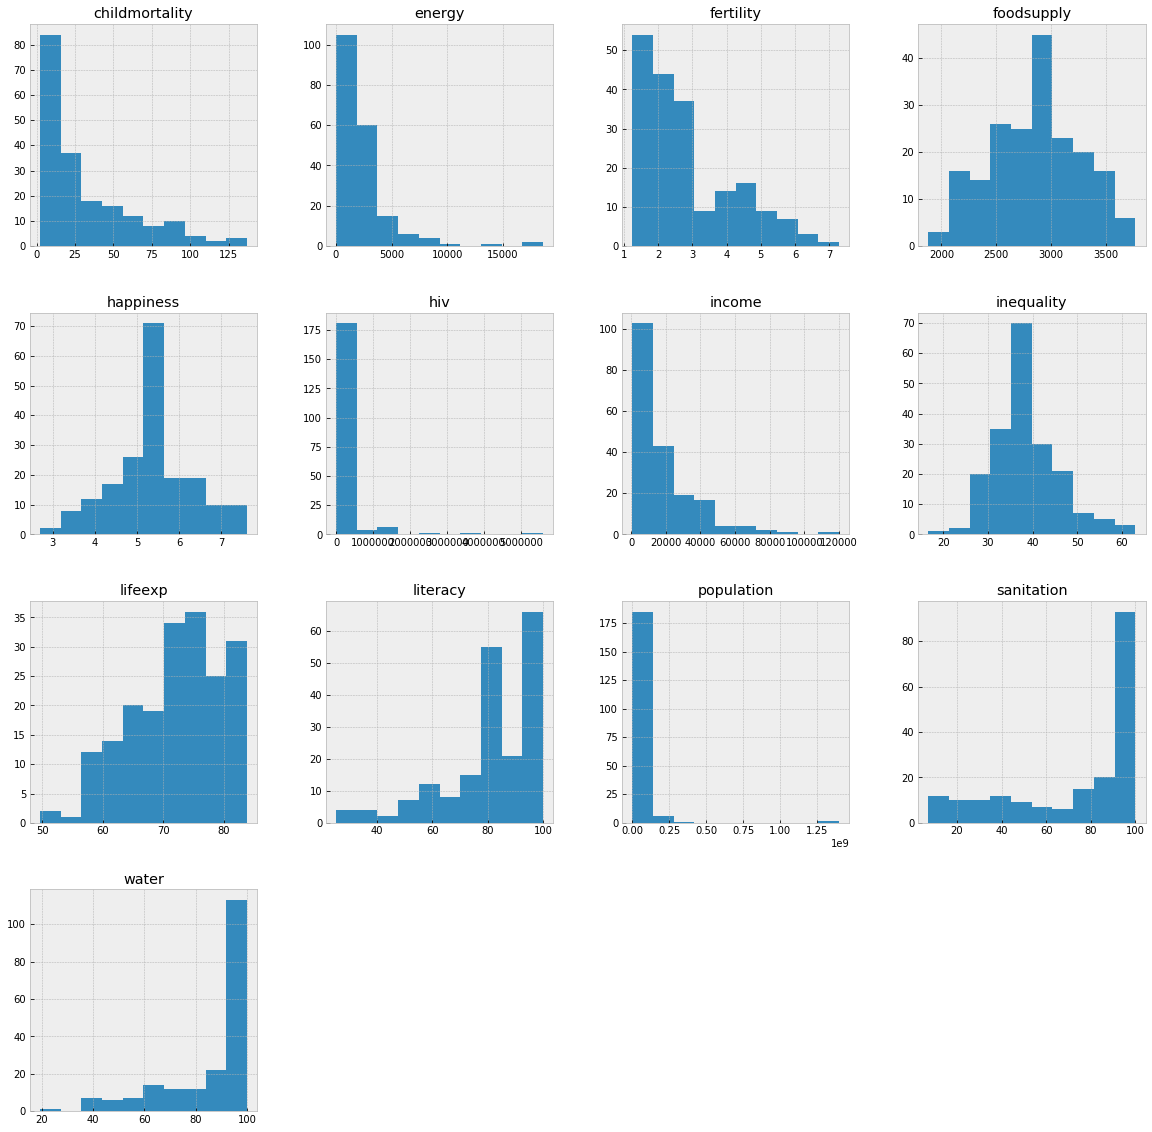

In [5]:
# Histogram plot
dataset.hist(figsize=(20,20))
plt.show()

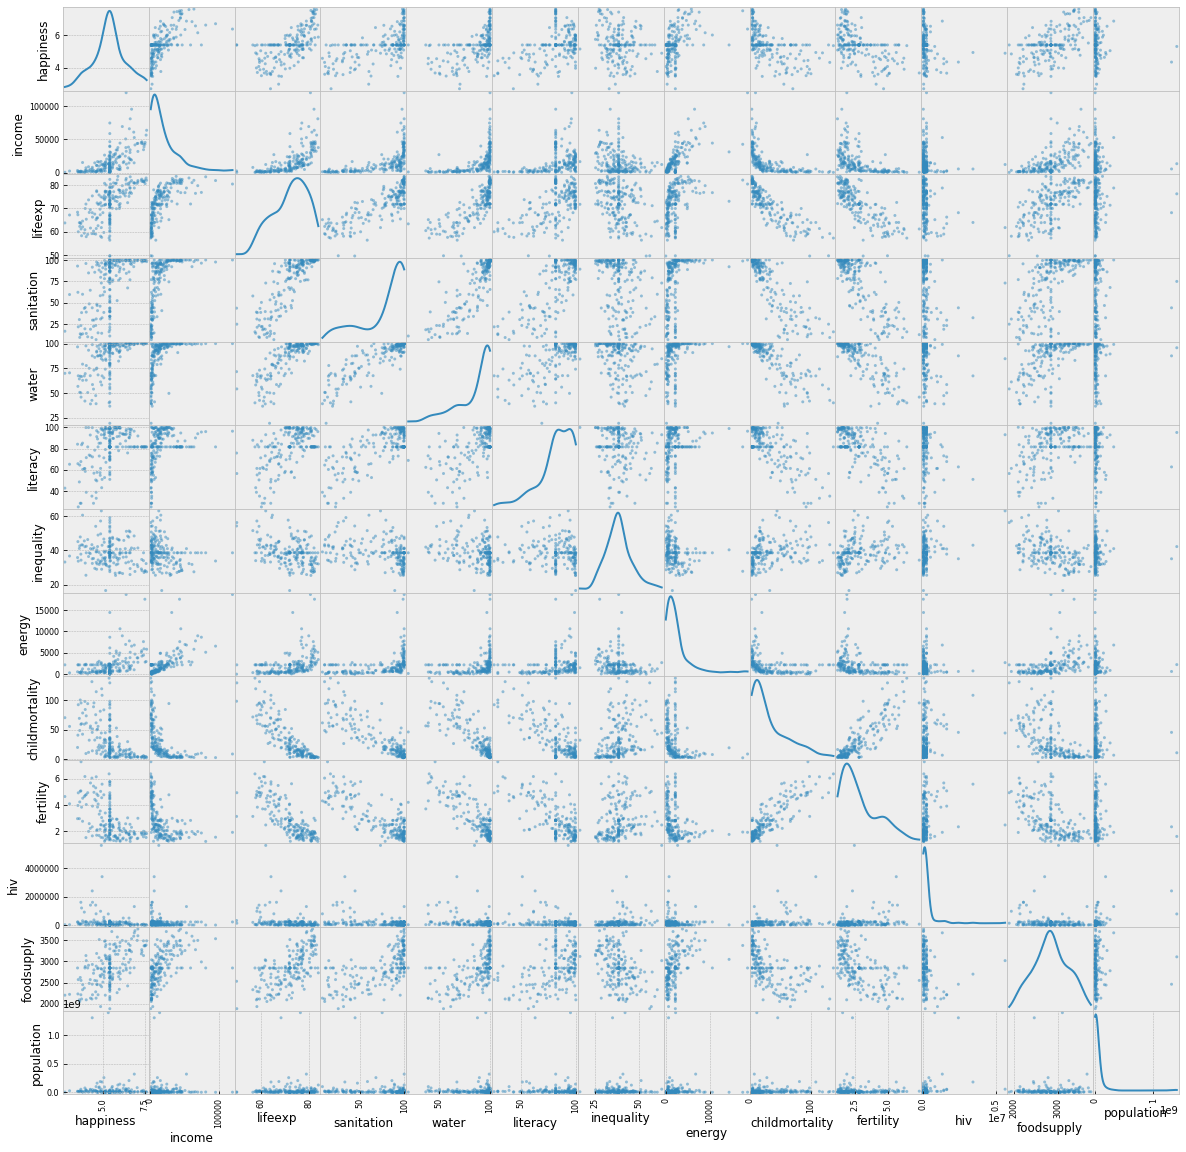

In [6]:
# Scatter plot
scatterMatrix(dataset)

## Prepare data

### Select features

In [9]:
dataset.columns

Index(['country', 'happiness', 'income', 'lifeexp', 'sanitation', 'water',
       'literacy', 'inequality', 'energy', 'childmortality', 'fertility',
       'hiv', 'foodsupply', 'population'],
      dtype='object')

In [10]:
y = dataset["lifeexp"]
X = dataset[['happiness', 'income', 'sanitation', 'water', 'literacy', 'inequality', 'energy', 'childmortality', 'fertility',  'hiv', 'foodsupply', 'population']]

### Scale features

In [12]:
# Rescale the data
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

# Convert X back to a Pandas DataFrame, for convenience
X = pd.DataFrame(rescaledX, index=X.index, columns=X.columns)

## Build models

### Split into test and training sets

In [13]:
test_size = 0.33
seed = 1
X_train, X_test, Y_train, Y_test =  train_test_split(X, y, test_size=test_size, random_state=seed)

### Create multiple models, fit them and check them

In [16]:
# Create and check a number of models
models = [LinearRegression(), KNeighborsRegressor(), SVR(gamma='auto')]

for model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_train)
    print(type(model).__name__, mean_absolute_error(Y_train, predictions))

LinearRegression 2.2920035925091766
KNeighborsRegressor 2.1955055341375442
SVR 3.6117510998705655


## Evaluate models

In [17]:
# Evaluate the models
for model in models:
    predictions = model.predict(X_test)
    print(type(model).__name__, mean_absolute_error(Y_test, predictions))

LinearRegression 2.4463956508110307
KNeighborsRegressor 2.5532340600575907
SVR 3.6854103854533866


In [18]:
# Choose best model
model = models[0]

In [19]:
# See predictions made
predictions = model.predict(X_test)
df = X_test.copy()
df['Prediction'] = predictions
df['Actual'] = Y_test
df["Error"] = Y_test - predictions
df

,happiness,income,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population,Prediction,Actual,Error
44,0.262009,0.027702,0.077701,0.724907,0.618474,0.556034,0.017505,0.436202,0.462810,0.041061,0.603175,1.970658e-02,63.053160,65.40000,2.346840
172,0.549625,0.097816,0.629789,1.000000,0.753331,0.473693,0.116950,0.247774,0.263789,0.038917,0.511086,2.142874e-07,70.676398,71.93369,1.257292
163,0.549625,0.010446,0.352131,0.558860,0.753331,0.439655,0.005617,0.398368,0.404959,0.038917,0.613757,7.214342e-05,65.940097,61.60000,-4.340097
35,0.420443,0.079387,0.926819,0.980173,0.638554,0.327586,0.043324,0.159496,0.342149,0.001686,0.867725,6.699267e-02,75.009327,71.90000,-3.109327
136,0.484455,0.042278,0.765390,0.890954,0.911647,0.392241,0.034718,0.146884,0.119008,0.044633,0.460317,6.684981e-02,72.167158,74.30000,2.132842
11,0.188311,0.011451,0.073396,0.591078,0.045515,0.672414,0.021916,0.725519,0.629752,0.011418,0.391534,7.563631e-03,59.303140,63.90000,4.596860
123,0.714052,0.122109,0.946190,0.977695,0.912985,0.418103,0.105453,0.077151,0.042975,0.087490,0.476190,4.906396e-02,75.760370,77.60000,1.839630
82,0.494371,0.122947,0.955876,0.970260,0.979920,0.329741,0.082323,0.014095,0.072727,0.038917,0.851852,4.407177e-04,76.479376,76.90000,0.420624
175,0.549625,0.115407,1.000000,0.995043,0.753331,0.473693,0.261448,0.105341,0.263789,0.038917,0.511086,7.357201e-06,74.072882,71.93369,-2.139192
102,0.627499,0.166506,0.804133,1.000000,0.969210,0.415948,0.085013,0.051929,0.044628,0.002846,0.783069,1.420654e-02,76.004635,75.10000,-0.904635


## Interpret model

### Intepret linear regression model

In [20]:
models[0].coef_

array([  5.00912637,   9.2096769 ,   5.41605897,   2.26122297,
        -4.13876626,  -3.31059309,  -5.53211396, -14.32217202,
        -1.63521978,  -2.01476135,   2.22581396,   3.20586791])

In [21]:
models[0].intercept_

69.60409836404614

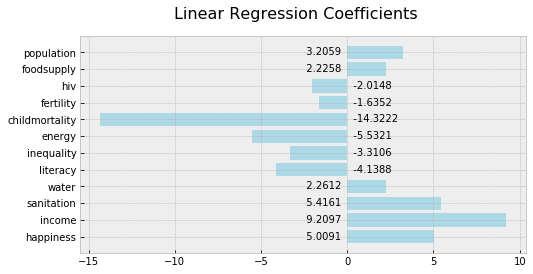

In [22]:
linearRegressionSummary(models[0], X.columns)

### Interpret knn model

In [23]:
# Distances for k nearest neighbours to each point
models[1].kneighbors(X)

(array([[0.        , 0.38911668, 0.3929857 , 0.4201251 , 0.51618381],
        [0.        , 0.20505552, 0.20891422, 0.23226123, 0.26827204],
        [0.        , 0.12274953, 0.1953064 , 0.22064946, 0.22207317],
        [0.        , 0.16349608, 0.20891422, 0.22826679, 0.28847733],
        [0.13327753, 0.15176936, 0.16216559, 0.16956607, 0.18772587],
        [0.10256832, 0.15520456, 0.24629633, 0.24943538, 0.25508778],
        [0.        , 0.3593436 , 0.38793799, 0.38953126, 0.39317685],
        [0.        , 0.31469369, 0.32420127, 0.35698837, 0.41441586],
        [0.        , 0.1962574 , 0.34952635, 0.44393928, 0.51551159],
        [0.        , 0.12677335, 0.18037416, 0.18620954, 0.22384403],
        [0.        , 0.1768139 , 0.24628597, 0.25110484, 0.26795007],
        [0.50647823, 0.51036495, 0.51934624, 0.53394104, 0.5422487 ],
        [0.        , 0.28806232, 0.34952635, 0.46122169, 0.46576997],
        [0.        , 0.31134313, 0.31241819, 0.3828958 , 0.39244964],
        [0.15281102,

In [24]:
# Actual nearest neighbour points
g = models[1].kneighbors_graph(X).toarray()

In [25]:
# First data point's nearest neighbours
g[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])